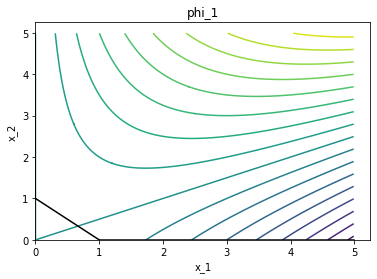

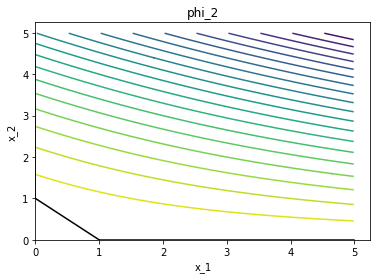

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def phi_1(x_1,x_2):
    return -(1/2)*x_1**2+x_1*x_2

def phi_2(x_1,x_2):
    return -x_2**2-x_1*x_2

delta = 0.01
x = np.arange(0, 5, delta)
y = np.arange(0, 5, delta)
X, Y = np.meshgrid(x, y)
Z_1 = phi_1(X,Y)
Z_2 = phi_2(X,Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z_1, 20)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
ax.set_title('phi_1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z_2, 20)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
ax.set_title('phi_2')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

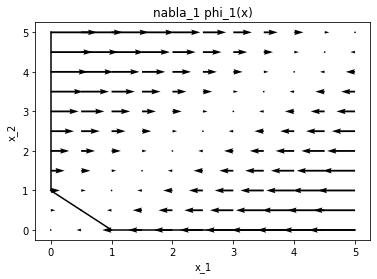

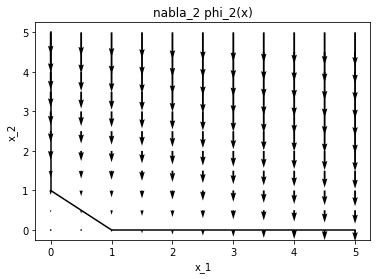

In [2]:
def grad_phi_1(x_1,x_2):
    return x_2-x_1

def grad_phi_2(x_1,x_2):
    return -2*x_2-x_1

u = np.arange(0, 5.5, 0.5)
v = np.arange(0, 5.5, 0.5)
U, V = np.meshgrid(u, v)

W_1 = grad_phi_1(U,V)
W_2 = grad_phi_2(U,V)

fig, ax = plt.subplots()
q = ax.quiver(U, V, W_1, np.zeros((11,11)))
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('nabla_1 phi_1(x)')
plt.show()

fig, ax = plt.subplots()
q = ax.quiver(U, V, np.zeros((11,11)), W_2)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('nabla_2 phi_2(x)')
plt.show()

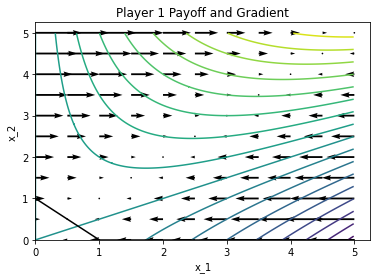

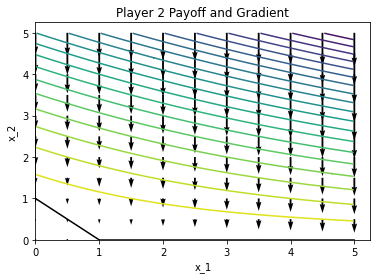

In [3]:
fig, ax = plt.subplots()
q = ax.quiver(U, V, W_1, np.zeros((11,11)))
CS = ax.contour(X, Y, Z_1, 20)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Player 1 Payoff and Gradient')
plt.show()

fig, ax = plt.subplots()
q = ax.quiver(U, V, np.zeros((11,11)), W_2)
CS = ax.contour(X, Y, Z_2, 20)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Player 2 Payoff and Gradient')
plt.show()

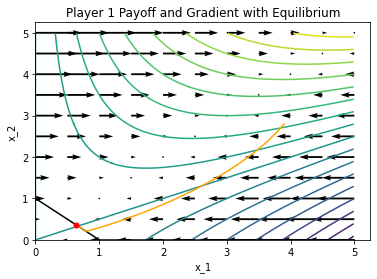

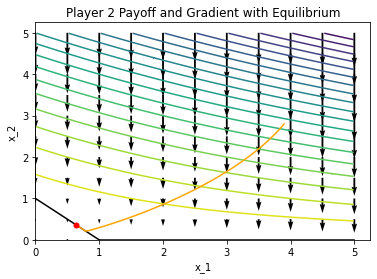

In [4]:
init = [4,3]
delta = 1e-6
x_old = [0,0]
x_new = init
x_k = []

r = [10,2]

tau = [1e-2,1e-2]

while True:
    if np.abs(x_new[0]-x_old[0]) > delta or np.abs(x_new[1]-x_old[1]) > delta:
        x_old = x_new.copy()
        x_new[0] = x_old[0] + tau[0]*r[0]*grad_phi_1(x_old[0],x_old[1])
        x_new[1] = x_old[1] + tau[1]*r[1]*grad_phi_2(x_old[0],x_old[1])
        if x_new[0]<0:
            x_new[0] = 0
        if x_new[1]<0:
            x_new[1] = 0
        if x_new[0]+x_new[1]-1<0:
            a = x_new[0]+x_new[1]-1
            x_new[0]=x_new[0]-a/2
            x_new[1]=x_new[1]-a/2
        x_k.append(x_new.copy())
    else:
        break
        
fig, ax = plt.subplots()
q = ax.quiver(U, V, W_1, np.zeros((11,11)))
CS = ax.contour(X, Y, Z_1, 20)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
plt.plot([x[0] for x in x_k], [x[1] for x in x_k],color="orange")
plt.plot([x_new[0]], [x_new[1]], marker='o', markersize=5, color="red")
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Player 1 Payoff and Gradient with Equilibrium')
plt.show()

fig, ax = plt.subplots()
q = ax.quiver(U, V, np.zeros((11,11)), W_2)
CS = ax.contour(X, Y, Z_2, 20)
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')
plt.plot([x[0] for x in x_k], [x[1] for x in x_k],color="orange")
plt.plot([x_new[0]], [x_new[1]], marker='o', markersize=5, color="red")
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Player 2 Payoff and Gradient with Equilibrium')
plt.show()

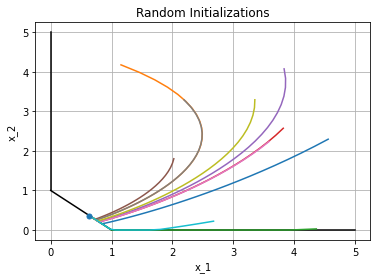

In [5]:
delta = 1e-6

r = [10,2]

tau = [1e-2,1e-2]

plt.figure()
plt.plot([0,1],[1,0],color='black')
plt.plot([1,5],[0,0],color='black')
plt.plot([0,0],[1,5],color='black')

for i in range(10):
    init = 5*np.random.rand(2)
    x_old = [0,0]
    x_new = init
    x_k = []
    while True:
        if np.abs(x_new[0]-x_old[0]) > delta or np.abs(x_new[1]-x_old[1]) > delta:
            x_old = np.copy(x_new)
            x_new[0] = x_old[0] + tau[0]*r[0]*grad_phi_1(x_old[0],x_old[1])
            x_new[1] = x_old[1] + tau[1]*r[1]*grad_phi_2(x_old[0],x_old[1])
            if x_new[0]<0:
                x_new[0] = 0
            if x_new[1]<0:
                x_new[1] = 0
            if x_new[0]+x_new[1]-1<0:
                a = x_new[0]+x_new[1]-1
                x_new[0]=x_new[0]-a/2
                x_new[1]=x_new[1]-a/2
            x_k.append(np.copy(x_new).tolist())
        else:
            break
            
    plt.plot([x[0] for x in x_k], [x[1] for x in x_k])

plt.plot([x_new[0]], [x_new[1]], marker='o', markersize=5)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Random Initializations')
plt.grid()
plt.show()
